In [2]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
## Reading Loan Data
loan_data=pd.read_csv("loan.csv")

C:\Users\vigne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
## Analysing the shape of the data
loan_data.shape

(39717, 111)

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
removing_columns=["policy_code","application_type",'collections_12_mths_ex_med','desc','url',"annual_inc_joint"
                  ,"dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal"
                  ,"open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il"
                  ,"il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi"
                  ,"total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util"
                  ,"chargeoff_within_12_mths","delinq_amnt","mo_sin_old_il_acct","mo_sin_old_rev_tl_op"
                  ,"mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc"
                  ,"mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq"
                  ,"num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl"
                  ,"num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats"
                  ,"num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m"
                  ,"pct_tl_nvr_dlq","percent_bc_gt_75","tax_liens","tot_hi_cred_lim","total_bal_ex_mort"
                  ,"total_bc_limit","total_il_high_credit_limit","pymnt_plan"
]

In [9]:
loan_data.drop(columns=removing_columns,axis=1,inplace=True)

In [10]:
loan_data.shape

(39717, 48)

In [11]:
##Loan Stautues by number
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## 10+ years is the most common emplyoee work length

In [12]:
loan_data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

## Splitting Month and Year from Issue date

In [13]:
month_year=loan_data['issue_d'].str.partition("-", True)
loan_data["issued_month"]=month_year[0]
loan_data["issued_year"]=str(20)+month_year[2]

In [14]:
loan_data[["issued_month","issued_year"]]

,issued_month,issued_year
0,Dec,2011
1,Dec,2011
2,Dec,2011
3,Dec,2011
4,Dec,2011
...,...,...
39712,Jul,2007
39713,Jul,2007
39714,Jul,2007
39715,Jul,2007


## Adding Coulumn Count for pivot

In [15]:
loan_data['Count']=1

In [16]:
pd.pivot_table(loan_data,values='Count',columns='loan_status',index='purpose',aggfunc=np.sum)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,NaN,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


In [17]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'mths_since_last_major_derog', 'pub_rec_bankruptcies', 'issued_month',
       'issued_year', 'Count'],
      dtype='object')

In [18]:
loan_data['int_rate']=loan_data['int_rate'].str.rstrip('%').astype('float')
loan_data['revol_util']=loan_data['revol_util'].str.rstrip('%').astype('float')

In [19]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,pub_rec_bankruptcies,issued_month,issued_year,Count
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,NaN,0.0,Dec,2011,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,NaN,0.0,Dec,2011,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,NaN,0.0,Dec,2011,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,NaN,0.0,Dec,2011,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,NaN,0.0,Dec,2011,1


In [20]:
loan_data[['int_rate','revol_util','total_acc','open_acc','annual_inc','installment','funded_amnt_inv','loan_amnt','dti']]

,int_rate,revol_util,total_acc,open_acc,annual_inc,installment,funded_amnt_inv,loan_amnt,dti
0,10.65,83.7,9,3,24000.0,162.87,4975.0,5000,27.65
1,15.27,9.4,4,3,30000.0,59.83,2500.0,2500,1.00
2,15.96,98.5,10,2,12252.0,84.33,2400.0,2400,8.72
3,13.49,21.0,37,10,49200.0,339.31,10000.0,10000,20.00
4,12.69,53.9,38,15,80000.0,67.79,3000.0,3000,17.94
...,...,...,...,...,...,...,...,...,...
39712,8.07,13.1,40,13,110000.0,78.42,1075.0,2500,11.33
39713,10.28,26.9,9,6,18000.0,275.38,875.0,8500,6.40
39714,8.07,19.4,20,11,100000.0,156.84,1325.0,5000,2.30
39715,7.43,0.7,26,17,200000.0,155.38,650.0,5000,3.72


In [21]:
loan_data[['int_rate','revol_util','total_acc','open_acc','annual_inc','installment','funded_amnt_inv','loan_amnt','dti']].describe()

,int_rate,revol_util,total_acc,open_acc,annual_inc,installment,funded_amnt_inv,loan_amnt,dti
count,39717.000000,39667.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000
mean,12.021177,48.832152,22.088828,9.294408,6.896893e+04,324.561922,10397.448868,11219.443815,13.315130
std,3.724825,28.332634,11.401709,4.400282,6.379377e+04,208.874874,7128.450439,7456.670694,6.678594
min,5.420000,0.000000,2.000000,2.000000,4.000000e+03,15.690000,0.000000,500.000000,0.000000
25%,9.250000,25.400000,13.000000,6.000000,4.040400e+04,167.020000,5000.000000,5500.000000,8.170000
50%,11.860000,49.300000,20.000000,9.000000,5.900000e+04,280.220000,8975.000000,10000.000000,13.400000
75%,14.590000,72.400000,29.000000,12.000000,8.230000e+04,430.780000,14400.000000,15000.000000,18.600000
max,24.590000,99.900000,90.000000,44.000000,6.000000e+06,1305.190000,35000.000000,35000.000000,29.990000


In [22]:
loan_data['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

## Making Pivot to find out maxium values to create bins

In [23]:
pd.pivot_table(loan_data,values='annual_inc',columns='loan_status',index='term',aggfunc=np.max)

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,840000.0,NaN,6000000.0
60 months,1250000.0,650000.0,3900000.0


In [24]:
pd.pivot_table(loan_data,values='installment',columns='loan_status',index='term',aggfunc=np.max)

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,1305.19,NaN,1295.21
60 months,1005.06,981.45,991.10


In [101]:
pd.pivot_table(loan_data,values='Count',columns='loan_status',index='term',aggfunc=np.sum)

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,3227.0,NaN,25869.0
60 months,2400.0,1140.0,7081.0


In [26]:
loan_data['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [27]:
loan_data['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [28]:
loan_data.annual_inc.quantile(0.90)

116000.0

In [29]:
loan_data.annual_inc.quantile(0.95)

142000.0

## Looking for Outliers in annual income
- the quantile info provides a unique perspective in annual income
- The values after 99 percentile look much larger with a small quarantile change
- Filtering out data above 99 percentile.

In [30]:
loan_data.annual_inc.quantile([0.95, 0.955,0.96, 0.965, 0.97,0.975, 0.978,0.98,0.99,0.995])

0.950    142000.00
0.955    150000.00
0.960    150000.00
0.965    158993.94
0.970    165757.92
0.975    175000.00
0.978    180000.00
0.980    187000.00
0.990    234999.36
0.995    300000.00
Name: annual_inc, dtype: float64

In [31]:
loan_data.annual_inc.sort_values(ascending=False)

30107    6000000.0
29639    3900000.0
39089    2039784.0
23551    1900000.0
7247     1782000.0
           ...    
36639       4800.0
37709       4200.0
30726       4200.0
29283       4080.0
35501       4000.0
Name: annual_inc, Length: 39717, dtype: float64

In [32]:
pd.pivot_table(loan_data,values='annual_inc',columns='loan_status',index='emp_length',aggfunc=np.mean)

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,54242.439211,71877.098592,63815.238231
10+ years,72578.473546,84717.607519,83239.595595
2 years,57409.903210,71128.679381,63963.024890
3 years,59601.141297,71285.410843,67832.856668
4 years,64417.025346,65441.585106,66968.616052
5 years,64249.784192,75597.567727,68653.557350
6 years,66101.841694,74240.295082,68329.710623
7 years,62575.109810,67533.018710,70417.223646
8 years,67778.180099,79985.363636,75520.273036


## Before removing quarantile base data

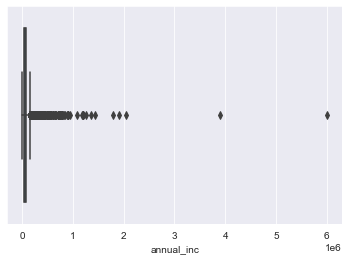

In [33]:
sns.boxplot(loan_data.annual_inc)

In [34]:
annual_inc_99_per = loan_data['annual_inc'].quantile(0.99)
loan_data_updated = loan_data[loan_data.annual_inc <= annual_inc_99_per]

In [35]:
loan_data_updated.shape

(39319, 51)

In [36]:
loan_data_updated.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,pub_rec_bankruptcies,issued_month,issued_year,Count
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,NaN,0.0,Dec,2011,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,NaN,0.0,Dec,2011,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,NaN,0.0,Dec,2011,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,NaN,0.0,Dec,2011,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,NaN,0.0,Dec,2011,1


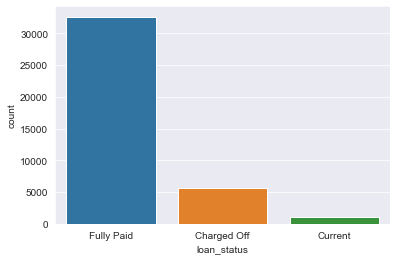

In [37]:
sns.countplot(loan_data_updated.loan_status)

In [38]:
loan_data_updated.sub_grade

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 39319, dtype: object

In [39]:
loan_data_updated.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [65]:
    loan_data_updated['revol_util_bins'] = pd.cut(loan_data_updated['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data_updated['int_rate_bins'] = pd.cut(loan_data_updated['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
loan_data_updated['open_acc_bins'] = pd.cut(loan_data_updated['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data_updated['annual_inc_bins'] = pd.cut(loan_data_updated['annual_inc'], bins=5,precision =0,labels =['4k-30k','30k-57k','57k-90','90-120k','120k-240'])
loan_data_updated['total_acc_bins'] = pd.cut(loan_data_updated['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data_updated['funded_amnt_inv_bins'] = pd.cut(loan_data_updated['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data_updated['loan_amnt_bins'] = pd.cut(loan_data_updated['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data_updated['dti_bins'] = pd.cut(loan_data_updated['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


<ipython-input-65-6074ffb09f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_updated['revol_util_bins'] = pd.cut(loan_data_updated['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
<ipython-input-65-6074ffb09f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_updated['int_rate_bins'] = pd.cut(loan_data_updated['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
<ipython-input-65-6074ffb09f03>:3: SettingWithCop

## Analysing emp_length,loan_status and annual_income

In [41]:
pd.pivot_table(loan_data_updated,values='annual_inc',columns='loan_status',index='emp_length',aggfunc=np.mean)

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,53592.422593,65844.550725,60681.941733
10+ years,68831.621915,81631.058394,77162.507199
2 years,53326.943173,71128.679381,60880.642978
3 years,57852.321996,69227.915854,64110.563193
4 years,59334.793224,65441.585106,65156.208822
5 years,62239.914825,72236.620230,65552.779097
6 years,63372.017705,64752.724138,66201.516506
7 years,61668.907939,67533.018710,66966.160195
8 years,67778.180099,66729.209302,70908.400806


In [42]:
pd.pivot_table(loan_data_updated,values='int_rate',columns='loan_status',index='emp_length',aggfunc=np.mean)

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,13.652813,14.862899,11.707453
10+ years,14.063032,14.957150,11.546196
2 years,13.821283,15.419897,11.693531
3 years,13.921924,15.016951,11.625476
4 years,13.950329,15.287128,11.772850
5 years,13.850044,14.503103,11.645074
6 years,13.978033,15.805517,11.607914
7 years,14.120191,14.592742,11.718146
8 years,13.753793,14.857674,11.469276


In [43]:
pd.pivot_table(loan_data_updated,values='Count',columns='loan_status',index='purpose',aggfunc=np.sum)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1332.0
credit_card,537.0,102.0,4450.0
debt_consolidation,2752.0,580.0,15165.0
educational,55.0,NaN,268.0
home_improvement,338.0,97.0,2459.0
house,58.0,14.0,299.0
major_purchase,220.0,37.0,1909.0
medical,106.0,12.0,568.0
moving,91.0,7.0,479.0


In [44]:
pd.pivot_table(loan_data_updated,values='Count',columns='loan_status',index='emp_length',aggfunc=np.sum)

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,455,69,2689
10+ years,1316,386,7038
2 years,561,97,3684
3 years,551,82,3426
4 years,456,94,2860
5 years,456,87,2712
6 years,305,58,1846
7 years,262,62,1435
8 years,203,43,1216


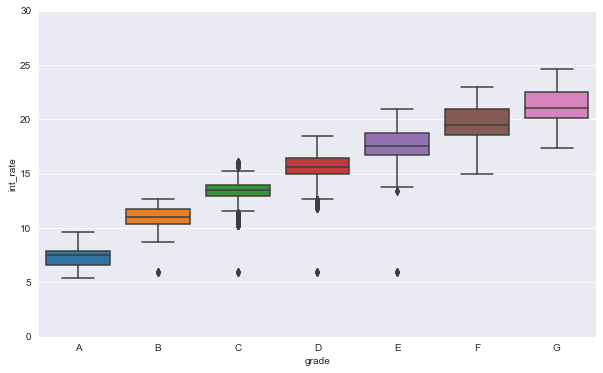

In [45]:
#boxplot for int_rate and sub_grade
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='grade', y="int_rate", data=loan_data_updated,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.axis(ymin=0, ymax=30)
plt.show()

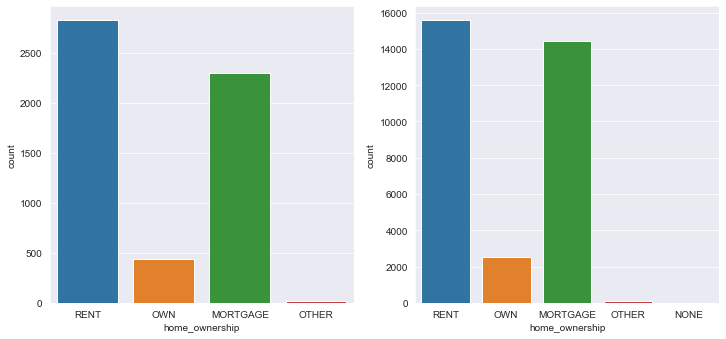

In [46]:
fig, ax = plt.subplots(figsize = (12,12))
ax.set(yscale = 'log')
plt.subplot(221)
sns.countplot(x='home_ownership', data=loan_data_updated[loan_data_updated['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='home_ownership', data=loan_data_updated[loan_data_updated['loan_status']=='Fully Paid'])

In [47]:
pd.pivot_table(loan_data_updated,values='Count',columns='loan_status',index='verification_status',aggfunc=np.sum)

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,2130,227,14474
Source Verified,1422,306,8135
Verified,2032,593,10000


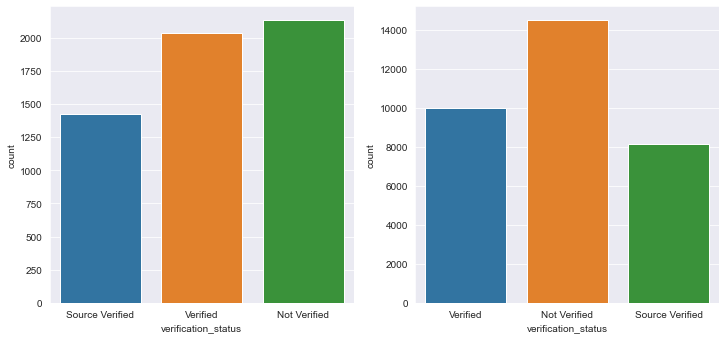

In [48]:
fig, ax = plt.subplots(figsize = (12,12))
ax.set(yscale = 'log')
plt.subplot(221)
sns.countplot(x='verification_status', data=loan_data_updated[loan_data_updated['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='verification_status', data=loan_data_updated[loan_data_updated['loan_status']=='Fully Paid'])

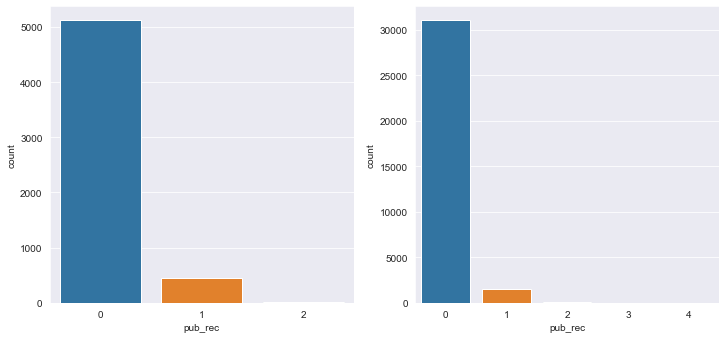

In [49]:
fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(221)
sns.countplot(x='pub_rec', data=loan_data_updated[loan_data_updated['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='pub_rec', data=loan_data_updated[loan_data_updated['loan_status']=='Fully Paid'])

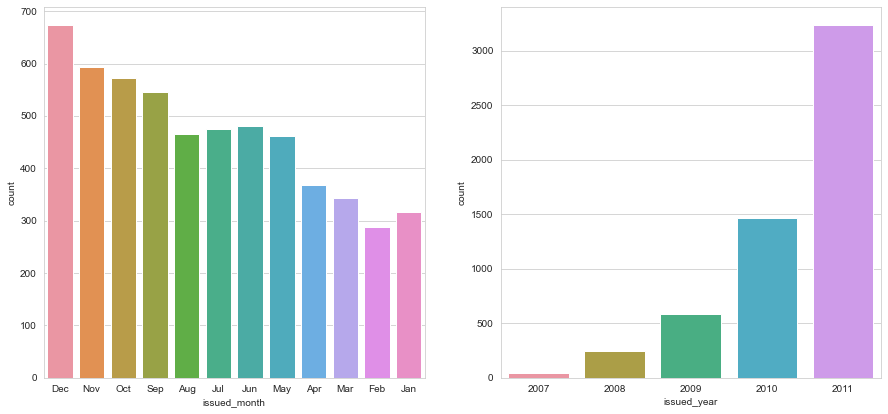

In [60]:
plt.figure(figsize=(15,15))
Palette = ["#090364", "#091e75"]
sns.set_style("whitegrid")
sns.set_palette(Palette)
plt.subplot(221)
sns.countplot(x='issued_month', data=loan_data_updated[loan_data_updated['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issued_year', data=loan_data_updated[loan_data_updated['loan_status']=='Charged Off'])


Text(0.5, 0, 'Interest Rate')

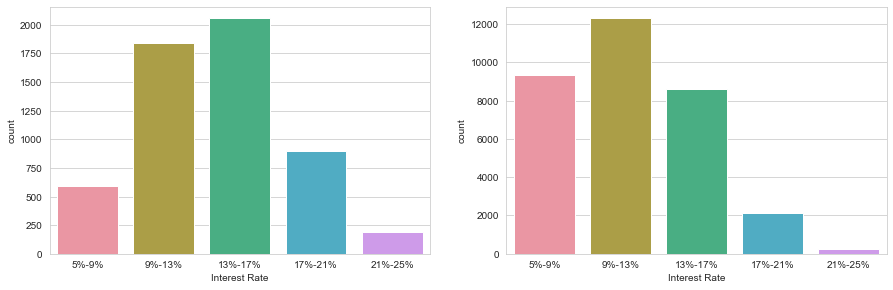

In [67]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_bins', data=loan_data_updated[loan_data_updated.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='int_rate_bins', data=loan_data_updated[loan_data_updated.loan_status == 'Fully Paid'])
plt.xlabel('Interest Rate')

Text(0.5, 0, 'Annual Income')

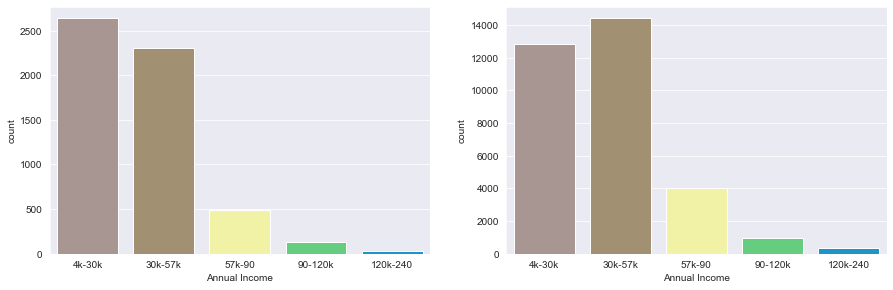

In [102]:
## countplot for count vs annual_inc range for FUlly_paid vs charged_off 
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='annual_inc_bins', data=loan_data_updated[loan_data_updated.loan_status == 'Charged Off'],palette="terrain_r")
plt.xlabel('Annual Income')
plt.subplot(222)
sns.countplot(x='annual_inc_bins', data=loan_data_updated[loan_data_updated.loan_status == 'Fully Paid'],palette="terrain_r")
plt.xlabel('Annual Income')

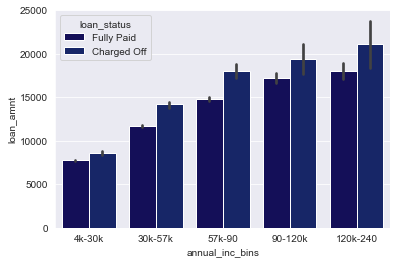

In [73]:
## barplot for loan_status vs annual_inc range
sns.set_style('darkgrid')
sns.barplot(x = "annual_inc_bins", y = "loan_amnt", hue = 'loan_status', data = loan_data_updated[loan_data_updated.loan_status != 'Current'])

In [78]:
pd.pivot_table(loan_data_updated,values='Count',columns='loan_status',index='purpose',aggfunc=np.sum)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1332.0
credit_card,537.0,102.0,4450.0
debt_consolidation,2752.0,580.0,15165.0
educational,55.0,NaN,268.0
home_improvement,338.0,97.0,2459.0
house,58.0,14.0,299.0
major_purchase,220.0,37.0,1909.0
medical,106.0,12.0,568.0
moving,91.0,7.0,479.0


## Annual Income vs loan purpose for Charged Off and Fully Paid

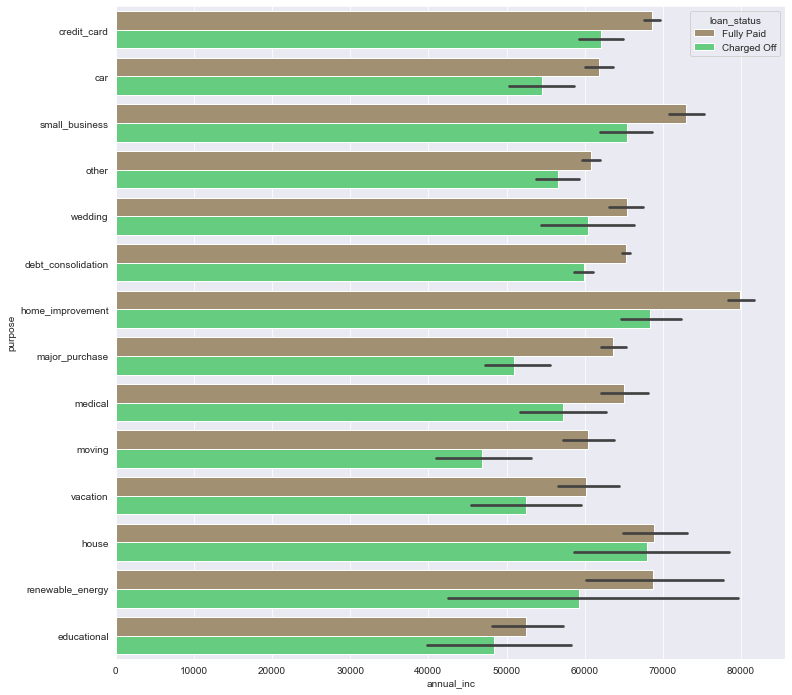

In [80]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan_data_updated[loan_data_updated.loan_status != 'Current'],x='annual_inc', y='purpose', hue ='loan_status',palette="terrain_r")
plt.show()

## Bar Plot for annual Income vs Loan Amount for charged off and Fully Paid

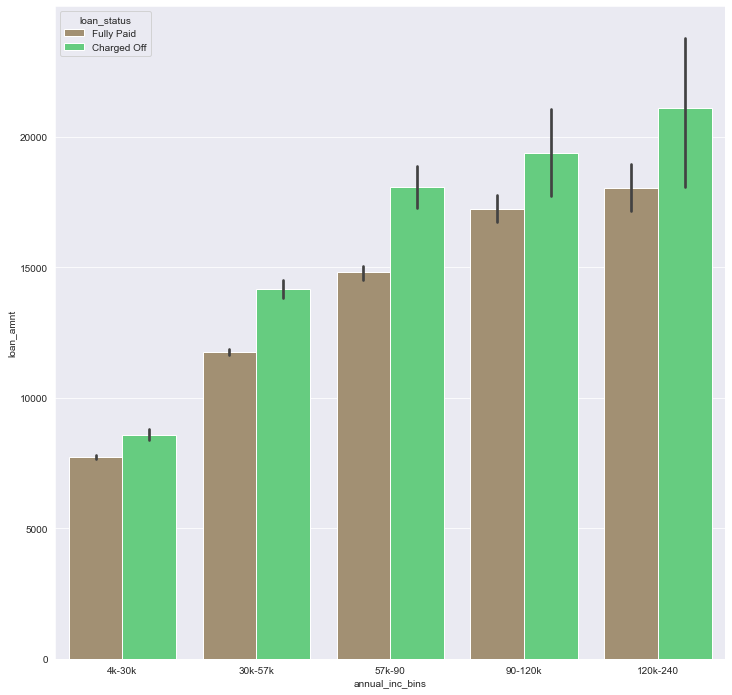

In [83]:
plt.figure(figsize=(12,12))
sns.barplot(x = "annual_inc_bins", y = "loan_amnt", hue = 'loan_status', data = loan_data_updated[loan_data_updated.loan_status != 'Current'],palette="terrain_r")
plt.show()

## Annual_inc vs Int rate

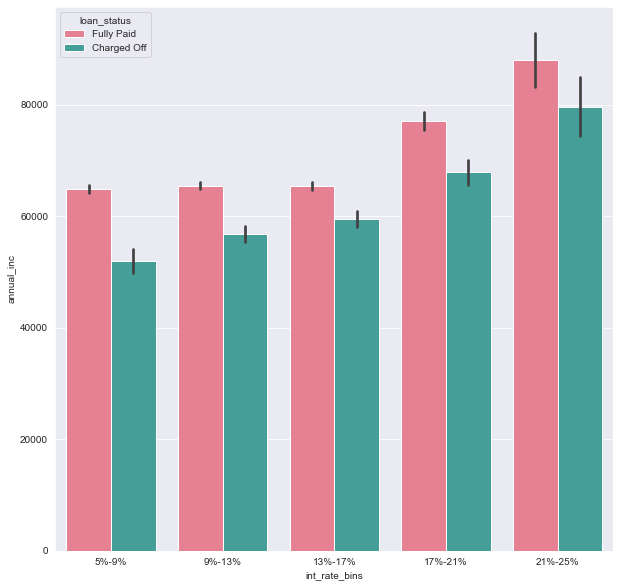

In [86]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data_updated[loan_data_updated.loan_status != 'Current'],x='int_rate_bins', y='annual_inc', hue ='loan_status',palette="husl")
plt.show()

In [87]:
pd.pivot_table(loan_data_updated,values='int_rate',columns='loan_status',index='emp_length',aggfunc=np.mean)

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,13.652813,14.862899,11.707453
10+ years,14.063032,14.957150,11.546196
2 years,13.821283,15.419897,11.693531
3 years,13.921924,15.016951,11.625476
4 years,13.950329,15.287128,11.772850
5 years,13.850044,14.503103,11.645074
6 years,13.978033,15.805517,11.607914
7 years,14.120191,14.592742,11.718146
8 years,13.753793,14.857674,11.469276


## Loan_amount vs Ownership

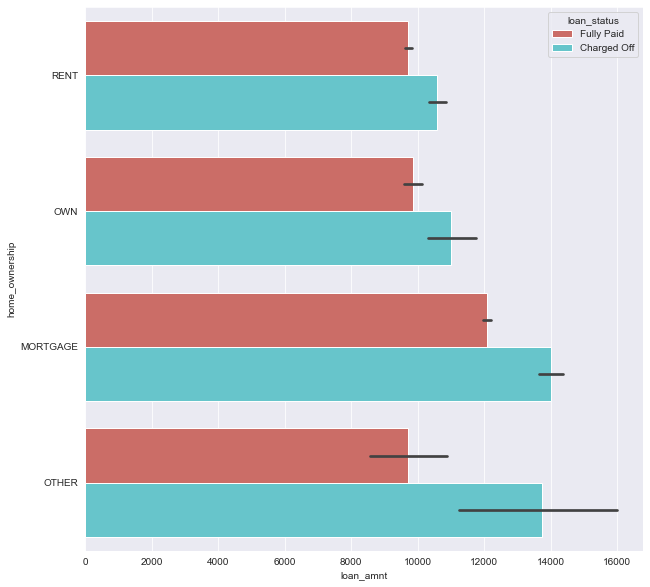

In [93]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data_updated[(loan_data_updated.loan_status != 'Current') & (loan_data_updated.home_ownership != 'NONE')],x='loan_amnt', y='home_ownership', hue ='loan_status',palette="hls")
plt.show()

## Loan_amount vs Term  

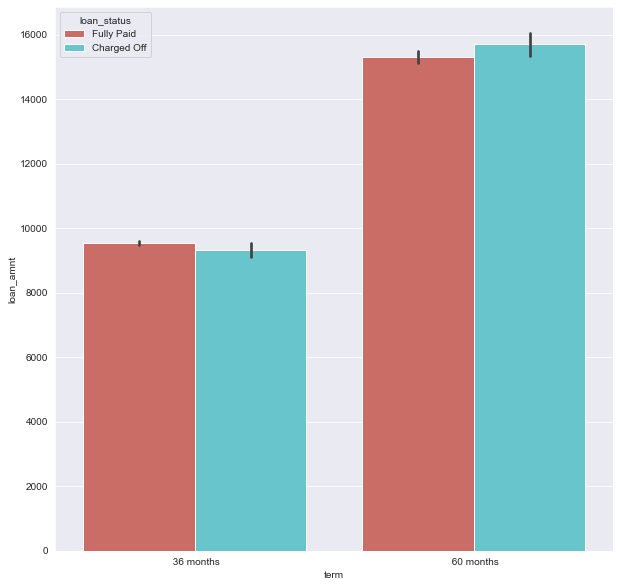

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data_updated[loan_data_updated.loan_status != 'Current'],x='term', y='loan_amnt', hue ='loan_status',palette="hls")
plt.show()

## Loan_amount_bins vs Int_rate 

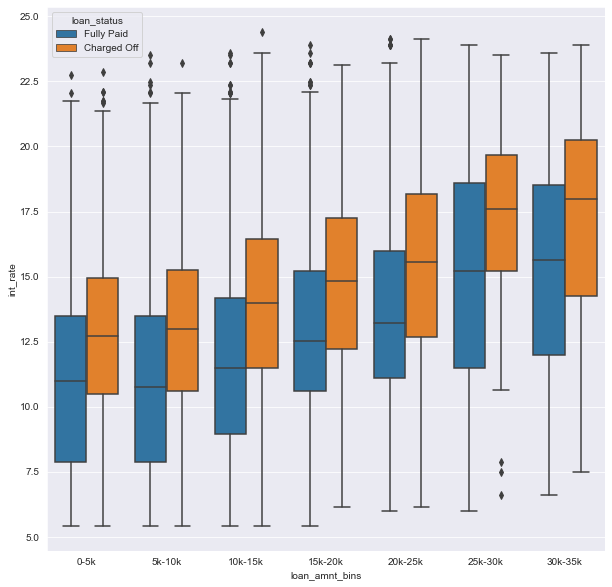

In [98]:
plt.figure(figsize=(10,10))
sns.boxplot(data =loan_data_updated[loan_data_updated.loan_status != 'Current'],y ='int_rate', x ='loan_amnt_bins', hue ='loan_status',palette="tab10")
plt.show()

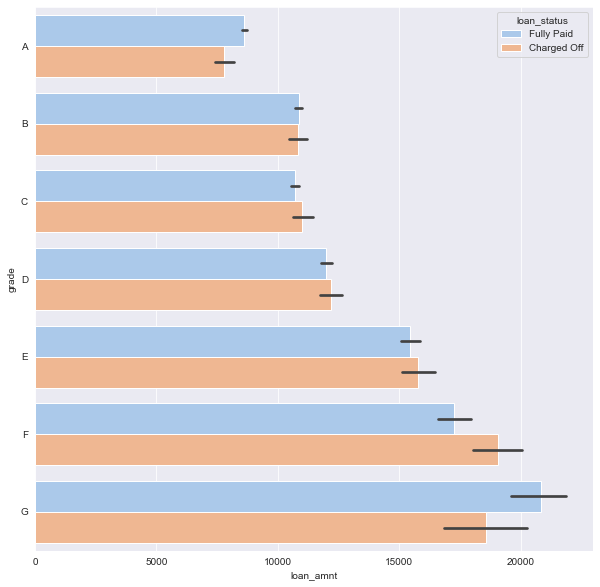

In [99]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data_updated[loan_data_updated.loan_status != 'Current'],x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

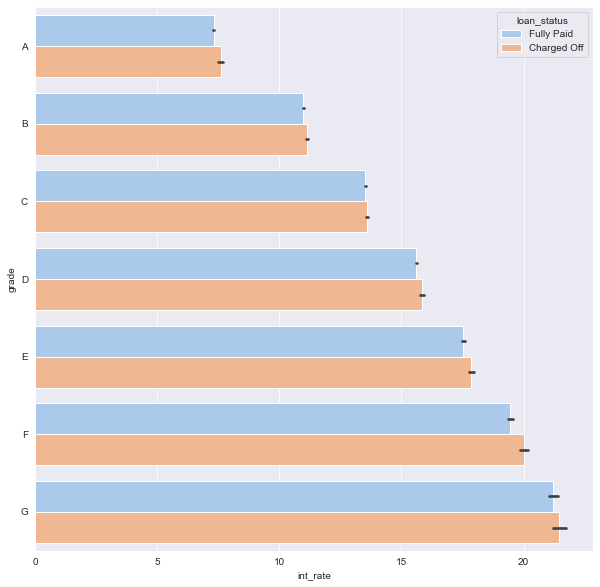

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data_updated[loan_data_updated.loan_status != 'Current'],x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

## Personal Observations
### There is more probability of defaulting on below factors:
- Applicants who defaulted on average has lower annual_inc than fully paid.
- Applicants who defaulted on average has higher interest rates than fully paid. 
- Top three reasons for loan were debt consolidation, other and small business. 
- Charged off has the highest percentage of Not verified category.
- Applicants with Charged_off status vs Fully Paid status doesn't have a significant difference in loan amounts and related to terms.
- Person with longest term takes larger loans.
- Higher the income,higher the loan amount.
- For grade G and interest rate above 20% for fully paid and charged_off applicants.
- when employment length is high the intrest rate is high for charged_off applicants.
- Applicants taking loan for 'home improvement' have annual incomes of 60k -70k
- Charged_off applicants whose home ownership is 'MORTGAGE' have loan amount of 12k-14k. 
- Charged_off applicants who receive interest at the rate of 21-24% and have an annual income of 70k-80k
- Charged_off applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %